In [3]:
% matplotlib inline
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from pix2pix_and_idcgan.models import idcgan_model, pix2pix_model
import cv2
model_path = 'pix2pix_and_idcgan/pretrained_models'
# img_dir = 'dataset/snow_japanese2_valid'
img_dir = 'dataset/snow_matsuo_all'
# img_dir = ''

### load model

In [4]:
# model = idcgan_model.GeneratorInLuaCode(3, 3)
# checkpoint = torch.load(os.path.join(model_path, 'idcgan/096.ckpt'))

model = pix2pix_model.Generator(3, 3)
checkpoint = torch.load(os.path.join(model_path, 'pix2pix/j_200.ckpt'), map_location=lambda storage, loc: storage)

model.load_state_dict(checkpoint['state_dict_g'])

### execute demo

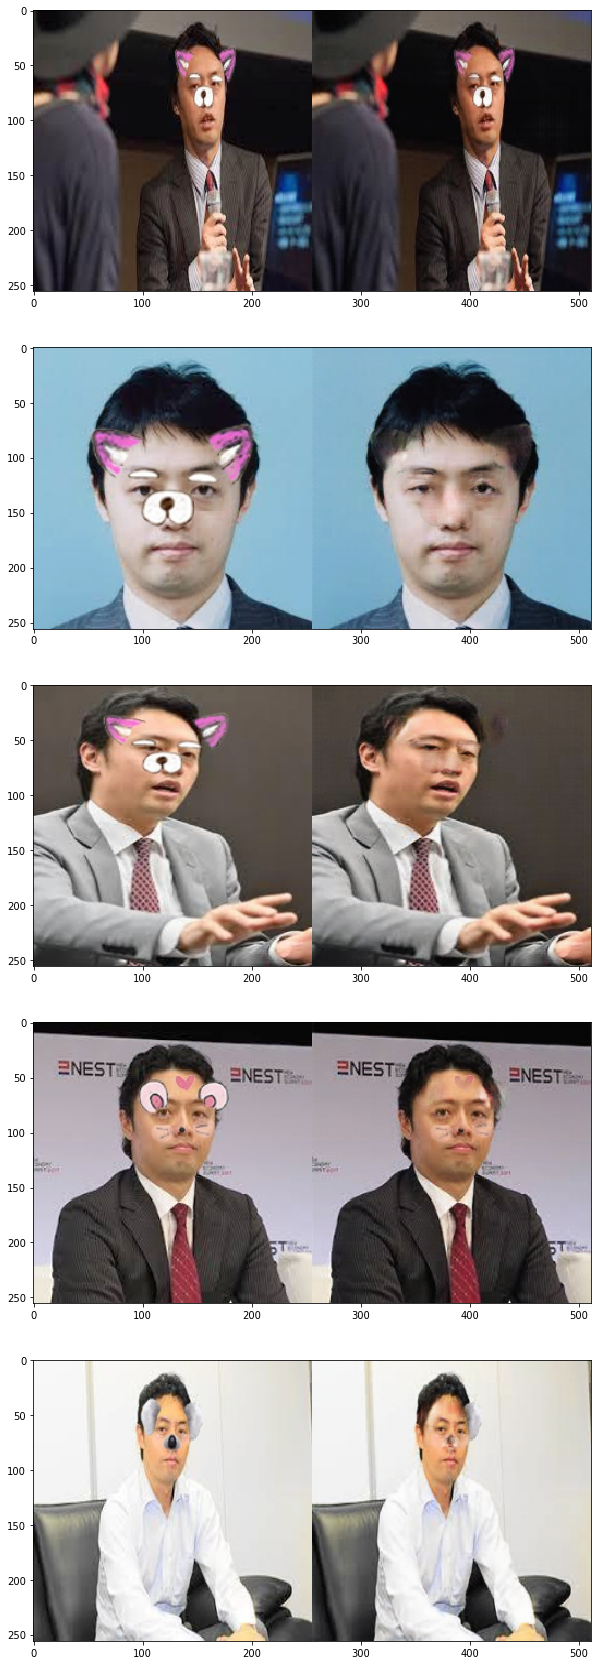

In [6]:
model = model.eval()

fig = plt.figure(figsize=(10, 30))
img_list = os.listdir(img_dir)[0:5]
# img_list = ['snow_fukuma.jpg']

for i, f in enumerate(img_list):
    plt.subplot(len(img_list),1, i + 1)
    ori_img = cv2.imread(os.path.join(img_dir, f))
    ori_img = cv2.resize(ori_img, (256, 256))
    img = (ori_img / 127.5) - 1
    img = img.transpose(2, 0, 1)[np.newaxis, :, :, :].astype(np.float32)
    img = Variable(torch.from_numpy(img))
    # predict
    output = model(img)
    output = output.data.numpy()[0].transpose(1, 2, 0)
    output = ((output + 1) * 127.5).astype(np.uint8)
    # cv2.imwrite(f, output)
    # picture
    cat_img = np.concatenate((ori_img, output), axis=1)
    plt.imshow(cat_img[:, :, [2, 1, 0]], aspect='auto')

plt.show()

save

In [7]:
for i, f in enumerate(img_list):
    ori_img = cv2.imread(os.path.join(img_dir, f))
    height, width = ori_img.shape[:2]
    ori_img = cv2.resize(ori_img, (256, 256))
    img = (ori_img / 127.5) - 1
    img = img.transpose(2, 0, 1)[np.newaxis, :, :, :].astype(np.float32)
    img = Variable(torch.from_numpy(img))
    # predict
    output = model(img)
    output = output.data.numpy()[0].transpose(1, 2, 0)
    output = ((output + 1) * 127.5).astype(np.uint8)
    output = cv2.resize(output, (height, width))
    cv2.imwrite('generated_iamges/' + f, output)